# T-TEST, ANOVA TEST AND REGRESSION ANALYSIS

In [701]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [702]:
# documentation with description of data: 
# https://vincentarelbundock.github.io/Rdatasets/doc/car/Salaries.html
url = r"https://vincentarelbundock.github.io/Rdatasets/csv/car/Salaries.csv"
data = pd.read_csv(url) 
data.head(10)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
5,6,AssocProf,B,6,6,Male,97000
6,7,Prof,B,30,23,Male,175000
7,8,Prof,B,45,45,Male,147765
8,9,Prof,B,21,20,Male,119250
9,10,Prof,B,18,18,Female,129000


In [703]:
print(data["rank"].unique()),
print(data["discipline"].unique())
print(data["sex"].unique())
print(data["yrs.service"].unique())

['Prof' 'AsstProf' 'AssocProf']
['B' 'A']
['Male' 'Female']
[18 16  3 39 41  6 23 45 20  8  2  1  0 34 36 26 31 30 19  4  9 21 27 38
 15 28 25 11  5 12 17 14 37  7 10 29 32 22 49 57 24 53 33 40 35 43 44 48
 46 51 13 60]


In [704]:
data.drop("Unnamed: 0", axis = "columns", inplace=True)

In [705]:
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [706]:
# rename the columns: columns with dots will be problematic for certain analyses 
data.rename({"yrs.since.phd":"yrs_since_phd", "yrs.service":"yrs_service", "sex":"gender"}, axis="columns", inplace=True)
data.head()

,rank,discipline,yrs_since_phd,yrs_service,gender,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [707]:
# descriptive statistics 
data.describe()

,yrs_since_phd,yrs_service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [708]:
# descriptive statistic for quantitative variables 
data.iloc[:,[2,3,5]].apply(["mean", "median", "std", "min","max", "skew"]).round(2)

,yrs_since_phd,yrs_service,salary
mean,22.31,17.61,113706.46
median,21.00,16.00,107300.00
std,12.89,13.01,30289.04
min,1.00,0.00,57800.00
max,56.00,60.00,231545.00
skew,0.30,0.65,0.71


# T-TEST

### Research Question: Is there a significant difference between male and female faculty salaries?

In [709]:
# let's extract the salary for male and female faculty
maleSalary = data.salary[data.gender=="Male"]
femaleSalary = data.salary[data.gender=="Female"]

In [710]:
# let's compute the mean of salary for male and female faculty
data[["salary", "gender"]].groupby("gender").mean()

,salary
gender,
Female,101002.410256
Male,115090.418994


In [711]:
# we want to compare male and female salary using a t-test, 
# we need to make sure assumptions of t-test are met
# that is, the assumption of independence, normality and homogoneity of variance
# the assumption of independence of error is usually assumed met 
# so we will test for normality and homogeneity of variance 
# we will test for normality using a histogram and boxplot to check distribution and outliers 
# we can use a Bartlett test or Levene test to test for homogeneity of variance

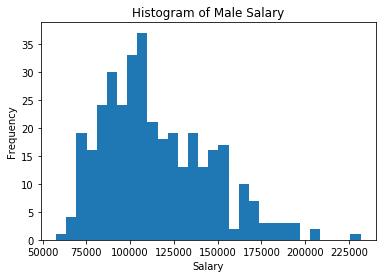

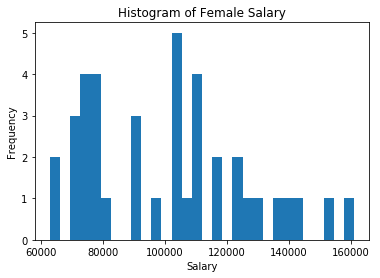

In [712]:
#let visualize the distribution of male and female salary with a histogram
plt.hist(maleSalary, bins = 30)
plt.title("Histogram of Male Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

plt.hist(femaleSalary, bins = 30)
plt.title("Histogram of Female Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

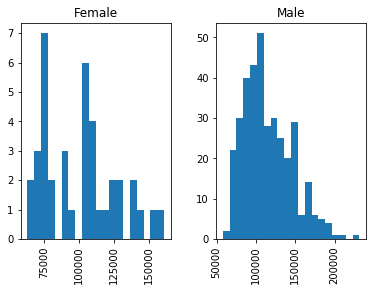

In [713]:
# alternative way to plot histograms using regular pandas hist
data[["salary", "gender"]].hist(by="gender", bins=20)
plt.show()

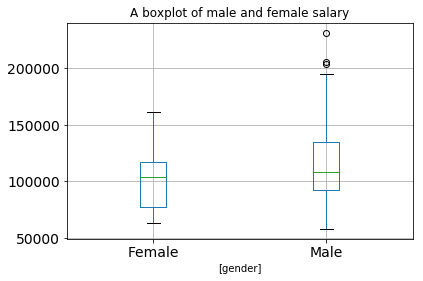

In [714]:
# let's use a boxplot to visualize the distribution of male and female salaries 
data[["salary", "gender"]].boxplot(by="gender", fontsize=14) # regular pandas boxplot 
plt.suptitle("")
plt.title("A boxplot of male and female salary")
plt.show()

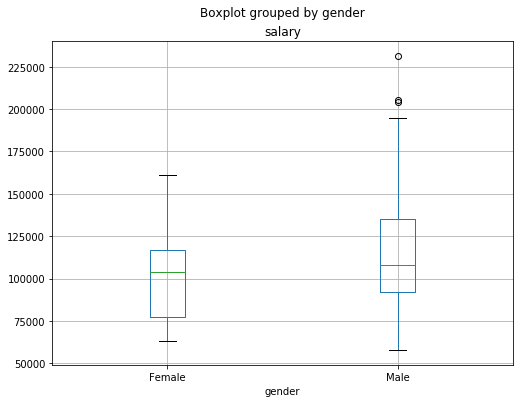

In [715]:
# Another way to create a boxplot with pandas boxplot
data.boxplot("salary", by="gender", figsize = (8, 6))
plt.show()

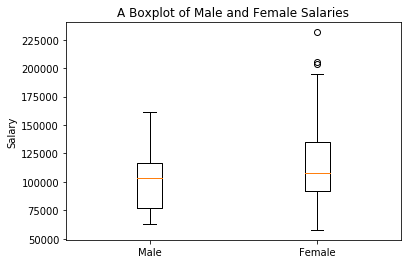

In [716]:
# An alternative way to construct a box plot using matplotlib 
y = femaleSalary.values, maleSalary.values, 
plt.boxplot(y)
plt.title("A Boxplot of Male and Female Salaries")
plt.ylabel("Salary")
plt.xticks([1,2], ["Male", "Female"])
# plt.xticks(np.arange(len(y))+1, ["Male", "Female"] )
plt.show()

In [717]:
# let's do Levene's test to test for homogeneity of variance assumption

from scipy import stats
# see documentation: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html

teststats_Var, pvalue_Var = stats.levene(maleSalary, femaleSalary)
print("This is a hypothesis test for the homogeneity of variance assumption")
print("H0:The variances of male and female faculty salaries are equal")
print (f"test statistics: {teststats_Var}")
print(f"pvalue: {pvalue_Var}")

alpha = 0.05
if pvalue_Var > alpha:
    print("Decision: Fail to reject the null hypothesis")
    print("Conclusion: The variances of male and female faculty salaries are equal")
    print("Proceed to perform a t-test")
else:
    print("Decision: Reject the null hypothesis")
    print("Conclusion: The variances of male and female faculty salaries are unequal")
    print("Proceed to do a Welch's test since variances are unequal")

This is a hypothesis test for the homogeneity of variance assumption
H0:The variances of male and female faculty salaries are equal
test statistics: 0.8400820216384142
pvalue: 0.35993255760111553
Decision: Fail to reject the null hypothesis
Conclusion: The variances of male and female faculty salaries are equal
Proceed to perform a t-test


In [718]:
# alternatively, let's test for homogeneity of variance with Bartlett test 
teststats_Var, pvalue_Var = stats.bartlett(maleSalary, femaleSalary)
print("This is a hypothesis test for homogeneity of variances")
print("The variances of male and female faculty salaries are equal")
print (f"test statistics: {teststats_Var}")
print(f"pvalue: {pvalue_Var}")

alpha = 0.05
if pvalue_Var > alpha:
    print("Decision: Fail to reject the null hypothesis")
    print("Conclusion: The variances of male and female faculty salaries are equal")
    print("Proceed to perform a t-test")
else:
    print("Decision: Reject the null hypothesis")
    print("Conclusion: The variances of male and female faculty salary are unequal")
    print("Proceed to do a Welch's test since variances are unequal")

This is a hypothesis test for homogeneity of variances
The variances of male and female faculty salaries are equal
test statistics: 1.5885368627800647
pvalue: 0.20753529990727493
Decision: Fail to reject the null hypothesis
Conclusion: The variances of male and female faculty salaries are equal
Proceed to perform a t-test


In [719]:
# now, let's proceed to perform a t-test
teststats_Mean, pvalue_Mean= stats.ttest_ind(maleSalary, femaleSalary, equal_var=True)

print("T Test: This is a hypothesis test for means of male and female faculty salary")
print("H0: Means of male and female faculaty salaries are equal")
print (f"test statistics (t): {teststats_Mean}")
print(f"pvalue: {pvalue_Mean}")

alpha = 0.05
if pvalue_Mean > alpha:
    print("Decision: Fail to reject the null hypothesis")
    print("Conclusion: Means of male and female faculaty salaries are equal")
else:
    print("Decision: Reject the null hypothesis")
    print("Conclusion: Means of male and female faculaty salaries are unequal")

T Test: This is a hypothesis test for means of male and female faculty salary
H0: Means of male and female faculaty salaries are equal
test statistics (t): 2.781674064262432
pvalue: 0.005667106519338681
Decision: Reject the null hypothesis
Conclusion: Means of male and female faculaty salaries are unequal


In [720]:
# An alternative t-test using a statmodels package

from statsmodels.stats.weightstats import CompareMeans
from statsmodels.stats.weightstats import DescrStatsW
desMaleSalary = DescrStatsW(maleSalary)
desFemaleSalary = DescrStatsW(femaleSalary)
teststat, pvalue, df = CompareMeans(desMaleSalary, desFemaleSalary).ttest_ind(alternative="two-sided", usevar="pooled")
print (f"t test statistics: {teststat}")
print(f"pvalue: {pvalue}")

t test statistics: 2.781674064262432
pvalue: 0.005667106519338681


# ANOVA TEST

#### Research Question: Is there a significant salary difference between professors, Assistant Professors and Associate Professors?

In [721]:
# let's view the unique values contained by the rank variable
data["rank"].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [722]:
# let's extract salaries for various faculty ranks 
ProfSalary = data["salary"][data["rank"]=="Prof"]
AsstProfSalary = data["salary"][data["rank"]=="AsstProf"]
AssocProfSalary = data["salary"][data["rank"]=="AssocProf"]

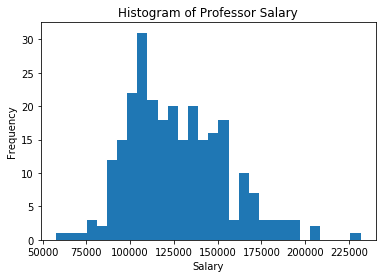

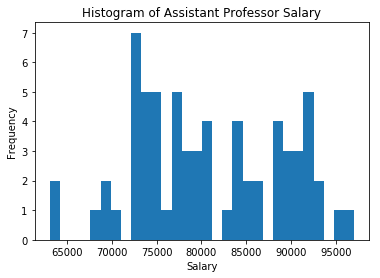

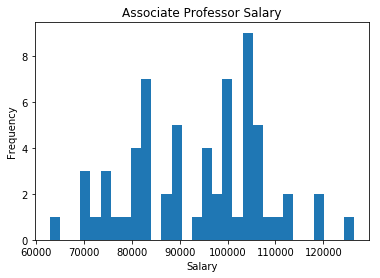

In [723]:
#let visualize the distribution of faculty salary by rank
plt.hist(ProfSalary, bins = 30)
plt.title("Histogram of Professor Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

plt.hist(AsstProfSalary, bins = 30)
plt.title("Histogram of Assistant Professor Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

plt.hist(AssocProfSalary, bins = 30)
plt.title("Associate Professor Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

In [724]:
# let's compute the descritives of faculty salary by rank 
data[["salary", "rank"]].groupby("rank").agg(["count", "mean", "median", "std","min", "max","skew"]).round(2)

salary                                                    
           count       mean    median       std    min     max  skew
rank                                                                
AssocProf     64   93876.44   95626.5  13831.70  62884  126431 -0.09
AsstProf      67   80775.99   79800.0   8174.11  63100   97032  0.08
Prof         266  126772.11  123321.5  27718.67  57800  231545  0.59

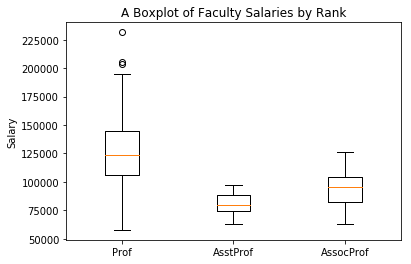

In [725]:
# let's visualize the distribution of faculty salary distribution by rank using a boxplot

y = ProfSalary.values, AsstProfSalary.values, AssocProfSalary.values 
plt.boxplot(y)
plt.title("A Boxplot of Faculty Salaries by Rank")
plt.ylabel("Salary")
plt.xticks(np.arange(len(y))+1, ["Prof", "AsstProf", "AssocProf"] )
plt.show()

In [726]:
# let's perform a test of homogeneity of variance 
teststats_Var, pvalue_Var = stats.levene(ProfSalary.values, AsstProfSalary.values, AssocProfSalary.values)

print("This is a hypothesis test for the homogeneity of variance assumption")
print("H0: variances of Prof, AsstProf and AssocProf salaries are equal variances")
print (f"test statistics (F): {teststats_Var}")
print(f"pvalue: {pvalue_Var}")

alpha = 0.05
if pvalue_Var > alpha:
    print("Decision: Fail to reject the null hypothesis")
    print("Conclusion: The variances of Prof, AsstProf and AssocProf salaries are equal")
    print("Proceed to perform an ANOVA test")
else:
    print("Decision: Reject the null hypothesis")
    print("Conclusion: At least the variance of one professor rank differs with respect to salary")
    print("Still proceed to perform ANOVA test since the F-test is robust to the homogeneity of variance assumption")

This is a hypothesis test for the homogeneity of variance assumption
H0: variances of Prof, AsstProf and AssocProf salaries are equal variances
test statistics (F): 38.711118112709656
pvalue: 4.476856382324779e-16
Decision: Reject the null hypothesis
Conclusion: At least the variance of one professor rank differs with respect to salary
Still proceed to perform ANOVA test since the F-test is robust to the homogeneity of variance assumption


In [727]:
teststats_Mean, pvalue_Mean = stats.f_oneway(ProfSalary.values, AsstProfSalary.values, AssocProfSalary.values)

print("One-Way ANOVA: This is a hypothesis test for means of faculty salary by rank ")
print("H0: The means of Prof, AsstProf and AssocProf salaries are equal")
print (f"test statistics (F): {teststats_Var}")
print(f"pvalue: {pvalue_Var}")

alpha = 0.05
if pvalue_Var > alpha:
    print("Decision: Fail to reject the null hypothesis")
    print("Conclusion: The means of Prof, AsstProf and AssocProf salaries are equal")
else:
    print("Decision: Reject the null hypothesis")
    print("Conclusion: The mean salary of at least one professor rank is different")
    print("proceed with a follow-up or post hoc test to find which groups are different")


One-Way ANOVA: This is a hypothesis test for means of faculty salary by rank 
H0: The means of Prof, AsstProf and AssocProf salaries are equal
test statistics (F): 38.711118112709656
pvalue: 4.476856382324779e-16
Decision: Reject the null hypothesis
Conclusion: The mean salary of at least one professor rank is different
proceed with a follow-up or post hoc test to find which groups are different


In [728]:
# An alternative One-way ANOVA test using a statmodels package
# you will need to run this code if a warning occurs: np.warnings.filterwarnings('ignore') 
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols("salary ~ rank", data=data).fit()
aov_table = sm.stats.anova_lm(model, type=2)
print(aov_table)


             df        sum_sq       mean_sq           F        PR(>F)
rank        2.0  1.432318e+11  7.161588e+10  128.217394  1.293048e-43
Residual  394.0  2.200689e+11  5.585504e+08         NaN           NaN


In [729]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# endogenous=response or dependent variable

tukey = pairwise_tukeyhsd(endog=data["salary"], groups=data['rank'], alpha=0.05)
print('Ho: The group means are equal')
print(tukey.summary())

Ho: The group means are equal
     Multiple Comparison of Means - Tukey HSD,FWER=0.05     
  group1   group2    meandiff     lower      upper    reject
------------------------------------------------------------
AssocProf AsstProf -13100.4524 -22819.1231 -3381.7818  True 
AssocProf   Prof    32895.6715  25154.1777 40637.1653  True 
 AsstProf   Prof    45996.1239  38395.618  53596.6299  True 
------------------------------------------------------------


Results of multiple group comparison test show that the mean of each groups is signifi different from the means of the other groups 

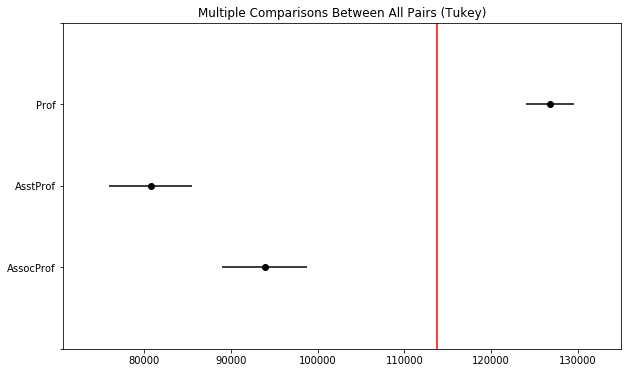

In [730]:
# Now, let's visualize the means of the groups compared with the tukey test
tukey.plot_simultaneous() # tukey is the object where the tukey test results were stored
#the above code plots the group confidence intervals

plt.vlines(x=data["salary"].mean(),ymin=-1,ymax=3,color="red") 
#The above code includes a line representing the mean of all faculty salary 
plt.show() 

# Simple Linear Regression Analysis

In [731]:
#lets now find out if there is a significant relationship between years of service and salary
# a simple linear regression can be analysed with a scipy package

from scipy.stats import stats

#use the code: stats.linregress(x,y)

In [732]:
x = data["yrs_service"]
y = data["salary"]
Results = stats.linregress(x,y)
Results 

LinregressResult(slope=779.569113694737, intercept=99974.65286632923, rvalue=0.3347446756998621, pvalue=7.528739019469755e-12, stderr=110.41693214331899)

In [733]:
# store the results in seperate objects for later use
slope=Results[0]
intercept = Results[1]
rsquared = Results[2]*2
pvalue = Results[3]
SE = Results[4]

In [734]:
print(slope)
print(intercept)
print(rsquared)

779.569113694737
99974.65286632923
0.6694893513997242


In [735]:
# you can use: dir(Results) to see what methods to use to extract parameters from Results 
print (f"slope: {Results.slope}")
print(f"intercept: {Results.intercept}")
print(f"rsquared: {Results.rvalue}")

slope: 779.569113694737
intercept: 99974.65286632923
rsquared: 0.3347446756998621


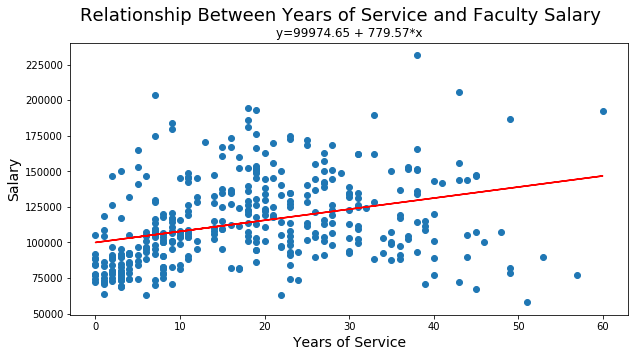

In [736]:
#let's plot the regression line
plt.figure(figsize=(10,5))
pred_y = intercept + slope*x
plt.scatter(x, y)
plt.plot(x, pred_y, color="r")
plt.suptitle("Relationship Between Years of Service and Faculty Salary", fontsize=18)
plt.title(f"y={round(intercept,2)} + {round(slope, 2)}*x")
plt.xlabel("Years of Service", fontsize=14)
plt.ylabel("Salary", fontsize=14)
plt.show()

In [737]:
# you can also use the stats model for a regression analysis 
from statsmodels.formula.api import ols
#model = ols("y~x", data=df).fit()
#model.summary()

In [738]:
x = data["yrs_service"]
y = data["salary"]

model = ols("y ~ x", data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     49.85
Date:                Tue, 29 May 2018   Prob (F-statistic):           7.53e-12
Time:                        14:43:18   Log-Likelihood:                -4635.7
No. Observations:                 397   AIC:                             9275.
Df Residuals:                     395   BIC:                             9283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.997e+04   2416.605     41.370      0.0

In [739]:
#output intercept and slope
model.params

Intercept    99974.652866
x              779.569114
dtype: float64

In [740]:
# store intercept and slope in seperate objects
intercept = round(model.params[0],2)
slope = round(model.params[1],2)
print(intercept)
print(slope)

99974.65
779.57


In [741]:
# extract rsquared, used to evaluate model fit. 
# low rsquared implies poor model fit
rsquared = model.rsquared
rsquared

0.11205399790940596

In [742]:
# to extract adjusted rsquared
model.rsquared_adj

0.10980603334715122

In [743]:
# extract pvalues of intercept and slopes to see if these parameters are significant
pvalue = model.pvalues
pvalue

Intercept    1.186078e-145
x             7.528739e-12
dtype: float64

In [744]:
# extract f-statistics 
F = model.fvalue
F

49.84687027139687

In [745]:
# extract pvalue of f statistics 
# compare this value to an alpha of 0.05 to tell if there is an overall relationship between x-variables and y
pvalue_F = model.f_pvalue
pvalue_F

7.528739019470033e-12

In [746]:
pred_y = model.predict()
pred_y[0:20] # to view just the first 20

array([114006.89691283, 112447.75868545, 102313.36020741, 130377.84830042,
       131936.98652781, 104652.0675485 , 117904.74248131, 135055.26298259,
       115566.03514022, 114006.89691283, 106211.20577589, 101533.79109372,
       100754.22198002,  99974.65286633, 114006.89691283, 102313.36020741,
       115566.03514022, 126480.00273195, 117904.74248131, 128039.14095934])

In [747]:
# extract residuals or error associated with predicting y values
resid = model.resid
resid[0:5] # to view just the first 5 residuals

0    25743.103087
1    60752.241315
2   -22563.360207
3   -15377.848300
4     9563.013472
dtype: float64

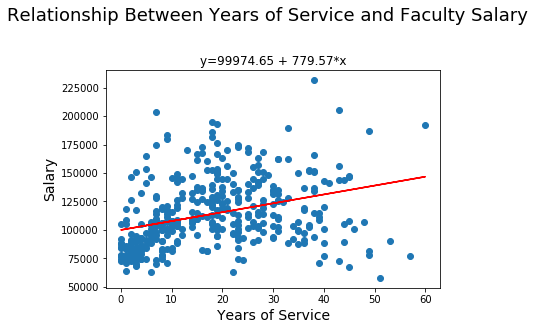

In [748]:
# let's visualize the relationship
x = data["yrs_service"]
y = data["salary"]

plt.scatter(x, y)
plt.plot(x, pred_y, color = "red")
plt.suptitle("Relationship Between Years of Service and Faculty Salary", fontsize=18, y=1.1)
plt.title(f"y={round(intercept,2)} + {round(slope, 2)}*x")
plt.xlabel("Years of Service", fontsize=14)
plt.ylabel("Salary", fontsize=14)
plt.show()

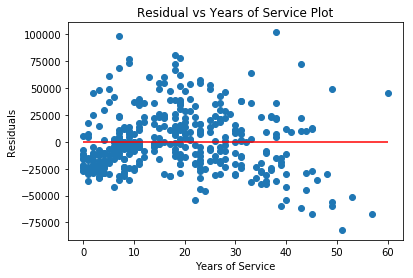

In [749]:
# let's evaluate our model 
# 1. scatter plot of x-values vs residuals
x = data["yrs_service"]
resid = model.resid
plt.scatter(x, resid)
plt.hlines(0, 0, 60, color = "red")
plt.title("Residual vs Years of Service Plot")
plt.xlabel("Years of Service")
plt.ylabel("Residuals")
plt.show()

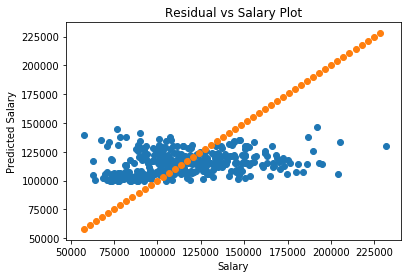

In [750]:
# let's evaluate our model 
# 1. scatter plot of predicted y-values versus y
# plot should be along the diagonals, that indicates a good model 
# the close the plot to the diagonal the more accurate the predicted values. 
y = data["salary"]
pred_y = model.predict()

plt.scatter(y, pred_y)
plt.title("Residual vs Salary Plot")
Max = y.max()
Min = y.min()
diag = np.arange(Min, Max, (Max-Min)/50)
plt.scatter(diag, diag)
plt.xlabel("Salary")
plt.ylabel("Predicted Salary")
plt.show()

# Multiple Regression Analysis 

In [751]:
data.head()

,rank,discipline,yrs_since_phd,yrs_service,gender,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [752]:
from statsmodels.formula.api import ols
x = data[["yrs_service", "yrs_since_phd"]]
y = data["salary"]

model1 = ols("y ~ x", data=data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     45.71
Date:                Tue, 29 May 2018   Prob (F-statistic):           1.40e-18
Time:                        14:43:20   Log-Likelihood:                -4617.9
No. Observations:                 397   AIC:                             9242.
Df Residuals:                     394   BIC:                             9254.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.991e+04   2843.560     31.620      0.0

In [753]:
model1.params

Intercept    89912.184464
x[0]          -629.101389
x[1]          1562.888902
dtype: float64

In [754]:
model1.pvalues

Intercept    3.810703e-110
x[0]          1.384961e-02
x[1]          2.753560e-09
dtype: float64

In [755]:
model.rsquared

0.11205399790940596

In [756]:
# to include categorical variables in the prediction model, 
# we need to make sure the levels of the categories are coded with numbers. 
# let's create code discipline and gender and include them as independent variable for prediction

data1 = data.copy()

In [757]:
data1.head()

,rank,discipline,yrs_since_phd,yrs_service,gender,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [758]:
g = {"Male":0, "Female":1}
d = {"A": 0, "B":1}
data1["gender"] =data1["gender"].map(g)
data1["discipline"] = data1["discipline"].map(d)

In [763]:
from statsmodels.formula.api import ols
x = data1[["yrs_service", "yrs_since_phd", "gender", "discipline"]]
y = data1["salary"]

model1 = ols("y ~ x", data=data1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     35.04
Date:                Tue, 29 May 2018   Prob (F-statistic):           5.06e-25
Time:                        14:45:10   Log-Likelihood:                -4598.6
No. Observations:                 397   AIC:                             9207.
Df Residuals:                     392   BIC:                             9227.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.887e+04   3494.758     22.568      0.0

You can use backward elimination by including all variables in the prediction model. Then start elimininating variables whose parameters are not significant by comparing the p-values of the parameters to your alpha=0.05 or alpha=0.01. The p-values of significant parameters are smaller than alpha. Continue to eliminate variables one after another until all variables are significant. Keep track of adjusted r for each model. Compare all the models and find the model that has the best fit. You can also use forward propagation and build models by adding variables. Generally, models with higher r-squared are better models but if adjusted r-squared drops when a variable is added even though r-squared is better, this model did not improve so previous model should be better. Adjusted r-squared is used to evaluate if a model has improved when a variable is added to the model. 
If a model does not build on each you can use r-square to compare the models. The model with greater r-squared is better. 